#### Importing necessary libraries

In [7]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('car_manu.csv')
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_mpg,City_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### From year 2015-2017 plot the top manufacturers

<Axes: xlabel='Make'>

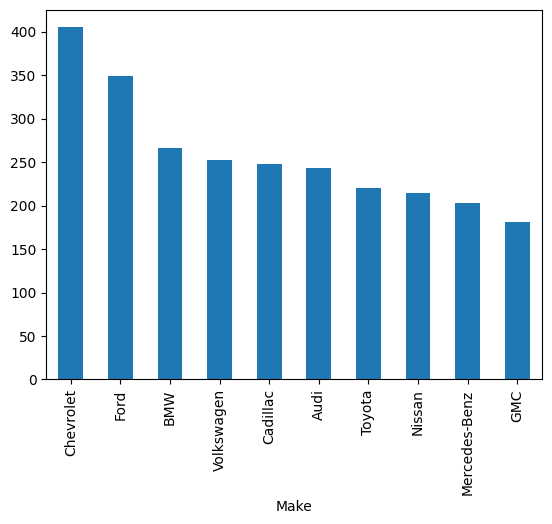

In [24]:
data=df.query('2015<=Year<=2017').Make.value_counts().nlargest(10)
data.plot(kind='bar')

#### Box plot to detect the outliers

Text(0.5, 1.0, 'engine hp box plot')

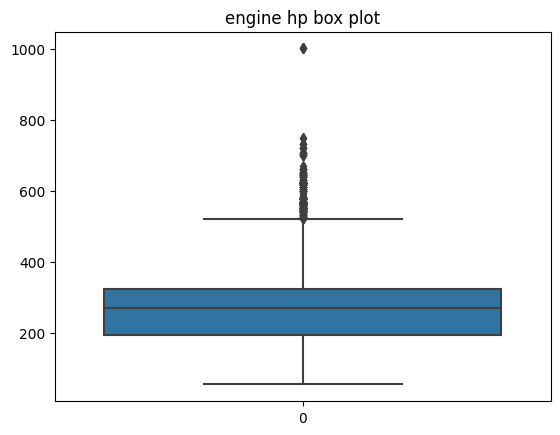

In [35]:
sns.boxplot(df['Engine_HP'])
plt.title('engine hp box plot')
# there are lot of outliers in engine hp

#### Comparison of Engine hp of ford and bmw

<Axes: xlabel='Engine_HP', ylabel='Density'>

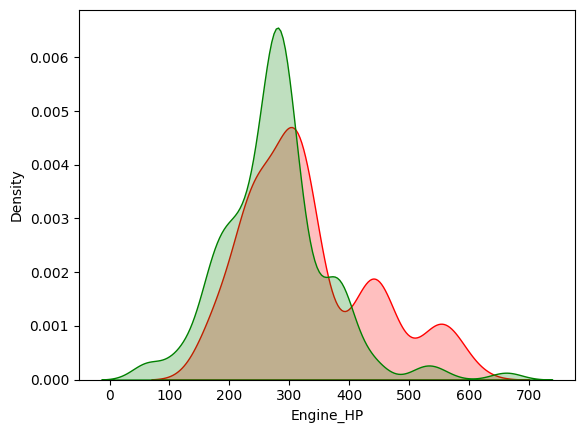

In [40]:
sns.kdeplot(df.loc[df.Make=='BMW'].Engine_HP,fill=True,color='red')
sns.kdeplot(df.loc[df.Make=="Ford"].Engine_HP,fill=True,color='green')

#### Comparing highway mpg of Chevrolet and Audii

<Axes: xlabel='Highway_mpg', ylabel='Density'>

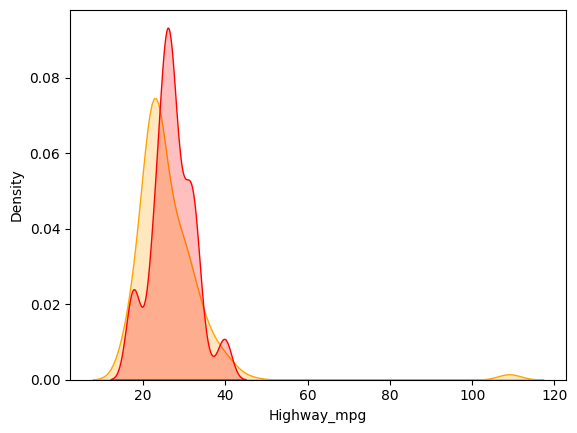

In [132]:
sns.kdeplot(df.loc[df.Make=="Chevrolet"].Highway_mpg,fill=True,color='orange')
sns.kdeplot(df.loc[df.Make=="Nissan"].Highway_mpg,fill=True,color='red')

In [55]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels', 'Doors',
       'Market_Category', 'Vehicle_Size', 'Vehicle_Style', 'Highway_mpg',
       'City_mpg', 'Popularity', 'MSRP'],
      dtype='object')

#### Understanding the corelation between the columns of df

<Axes: >

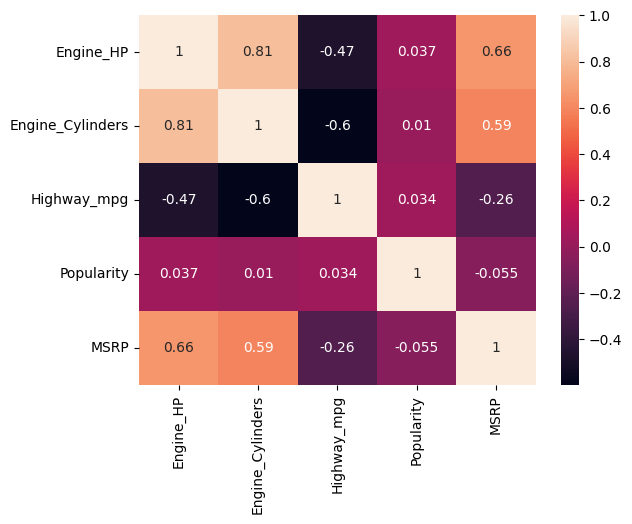

In [59]:
sub=df[['Engine_HP','Engine_Cylinders','Highway_mpg','Popularity','MSRP']]
i=sub.corr()
sns.heatmap(i,annot=True)

#### Top 10 most expensive cars

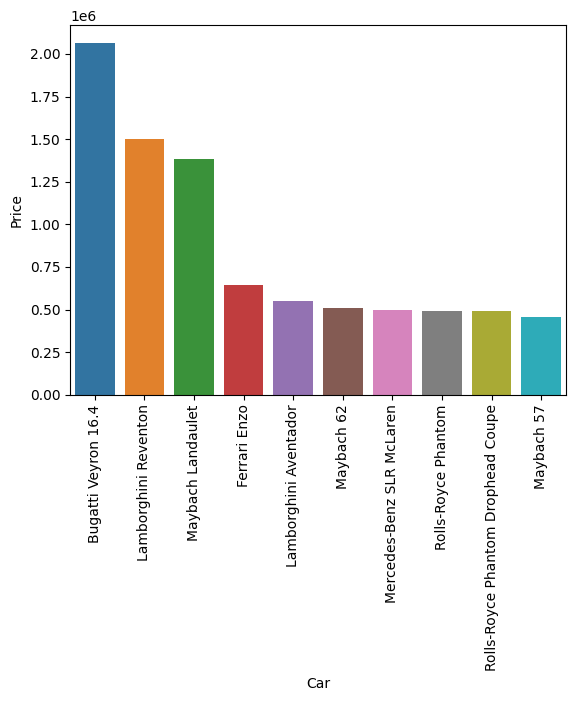

In [113]:
data=df.groupby(['Make','Model'])['MSRP'].agg(Price=('max')).nlargest(10,columns=['Price'])
data.reset_index(inplace=True)
data['Car']=data['Make']+" "+data['Model']
sns.barplot(data,x='Car',y='Price')
plt.xticks(rotation=90);

#### top 10 cars with heighest highway mpg

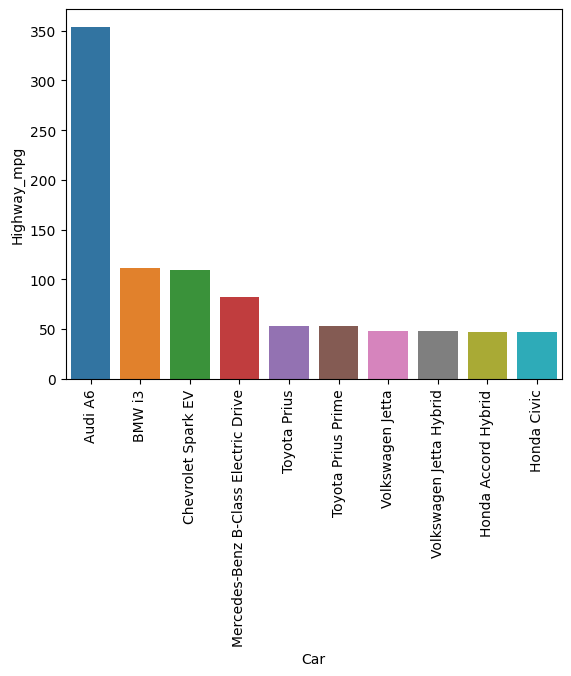

In [114]:
data=df.groupby(['Make','Model'])['Highway_mpg'].agg(Highway_mpg=('max')).nlargest(10,columns=['Highway_mpg'])
data.reset_index(inplace=True)
data['Car']=data['Make']+" "+data['Model']
sns.barplot(data,x='Car',y='Highway_mpg')
plt.xticks(rotation=90);

#### Scatter plot between MSRP and engine hp

In [157]:
def remove_outliers_iqr(df):
    lower=df['Engine_HP'].quantile(.25)
    upper=df['Engine_HP'].quantile(.75)
    iqr=upper-lower
    lower_bound=lower-1.5*iqr
    upper_bound=upper+1.5*iqr
    return df[(df['Engine_HP'] >= lower_bound) & (df['Engine_HP'] <= upper_bound)]
df_cleaned = remove_outliers_iqr(df)
sns.regplot(y=df_cleaned['MSRP(in k $)'],x=df_cleaned['Engine_HP'])

<Axes: xlabel='Engine_HP', ylabel='MSRP(in k $)'>

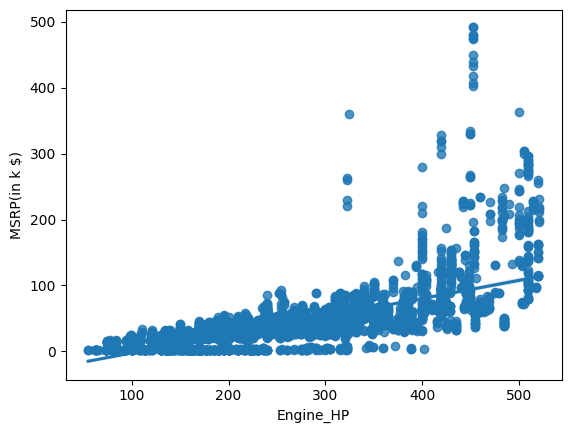